import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.simplefilter('ignore')

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Read the data

In [3]:
# read X_train
file_path='/content/drive/MyDrive/Colab Notebooks/Data 602/Final_602/final_X_train'
with open(file_path, 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(line.strip().split(','))

train_X = pd.DataFrame(data[1:], columns=data[0])
print("Shape of X_train: ", train_X.shape, "Type: ", type(train_X),"\n")
train_X.info()

Shape of X_train:  (5000000, 14) Type:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   age             object
 1   workclass       object
 2   fnlwgt          object
 3   education       object
 4   education_num   object
 5   marital_status  object
 6   occupation      object
 7   relationship    object
 8   race            object
 9   sex             object
 10  capital_gain    object
 11  capital_loss    object
 12  hours_per_week  object
 13  native_country  object
dtypes: object(14)
memory usage: 534.1+ MB


In [4]:
# read y_train
file_path='/content/drive/MyDrive/Colab Notebooks/Data 602/Final_602/final_y_train'
with open(file_path, 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(line.strip().split(','))
train_y = pd.DataFrame(data[1:], columns=data[0])
print("Shape of y_train: ", train_y.shape, "Type: ", type(train_y),"\n")
train_y.info()

Shape of y_train:  (5000000, 1) Type:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   class   object
dtypes: object(1)
memory usage: 38.1+ MB


In [5]:
#read X_test
file_path='/content/drive/MyDrive/Colab Notebooks/Data 602/Final_602/final_X_test'
with open(file_path, 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(line.strip().split(','))

test_X = pd.DataFrame(data[1:], columns=data[0])
print("Shape of X_test: ", test_X.shape, "Type: ", type(test_X),"\n")
test_X.info()

Shape of X_test:  (30000, 14) Type:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  object
 1   workclass       30000 non-null  object
 2   fnlwgt          30000 non-null  object
 3   education       30000 non-null  object
 4   education_num   30000 non-null  object
 5   marital_status  30000 non-null  object
 6   occupation      30000 non-null  object
 7   relationship    30000 non-null  object
 8   race            30000 non-null  object
 9   sex             30000 non-null  object
 10  capital_gain    30000 non-null  object
 11  capital_loss    30000 non-null  object
 12  hours_per_week  30000 non-null  object
 13  native_country  30000 non-null  object
dtypes: object(14)
memory usage: 3.2+ MB


In [6]:
#read y_test

file_path='/content/drive/MyDrive/Colab Notebooks/Data 602/Final_602/final_y_test'
with open(file_path, 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    data.append(line.strip().split(','))
test_y = pd.DataFrame(data[1:], columns=data[0])
print("Shape of y_test: ", test_y.shape,"Type: ", type(test_y),"\n")
test_y.info()

Shape of y_test:  (30000, 1) Type:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB


In [7]:
#create train dataframe with X_train and y_train
df_train= pd.concat([train_X, train_y], axis=1)
print("Shape of train data: ", df_train.shape)

#create train dataframe with X_test and y_test
df_test= pd.concat([test_X, test_y], axis=1)
print("\nShape of test data: ", df_test.shape)

Shape of train data:  (5000000, 15)

Shape of test data:  (30000, 15)


# Clean the Data and change datatypes

In [8]:
df_train.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,Private,147548,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,United-States,0
1,48,Private,195491,HS-grad,9.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,30,United-States,0
2,43,Self-emp-not-inc,198096,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,60,United-States,0
3,18,Private,280603,11th,7.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,30,United-States,0


In [9]:
#dropping empty string
replace=['','?']
df_train.replace(replace, np.nan, inplace=True)
df_train.dropna(inplace=True)

df_test.replace(replace, np.nan, inplace=True)
df_test.dropna(inplace=True)

#replace the datatypes
int_list= ['age','hours_per_week']
float_list= ['education_num','capital_gain','capital_loss']

df_train[int_list]= df_train[int_list].astype(int)
df_train[float_list]= df_train[float_list].astype(float)
df_train['class']=df_train['class'].astype(int)

df_test[int_list]= df_test[int_list].astype(int)
df_test[float_list]= df_test[float_list].astype(float)
df_test['class']=df_test['class'].astype(int)

print("Shape of df_train: ", df_train.shape, "Type: ", type(df_train),"\n")
print("Shape of df_test: ", df_test.shape, "Type: ", type(df_test),"\n")
df_train.isnull().sum()
df_train.info()


Shape of df_train:  (4476020, 15) Type:  <class 'pandas.core.frame.DataFrame'> 

Shape of df_test:  (30000, 15) Type:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476020 entries, 0 to 4999999
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   age             int64  
 1   workclass       object 
 2   fnlwgt          object 
 3   education       object 
 4   education_num   float64
 5   marital_status  object 
 6   occupation      object 
 7   relationship    object 
 8   race            object 
 9   sex             object 
 10  capital_gain    float64
 11  capital_loss    float64
 12  hours_per_week  int64  
 13  native_country  object 
 14  class           int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 546.4+ MB


In [10]:
# Since data is large we will chose random 50,000 random TRAIN records and 15,000 random TEST records
df_train = df_train.sample(n=50000, random_state=42)
df_test = df_test.sample(n=15000, random_state=42)

In [11]:
# X_train, y_train, X_test, y_test
X_train = df_train.drop(columns=['class'])
y_train = df_train['class']
X_test = df_test.drop(columns=['class'])
y_test = df_test['class']

# Data Exploration

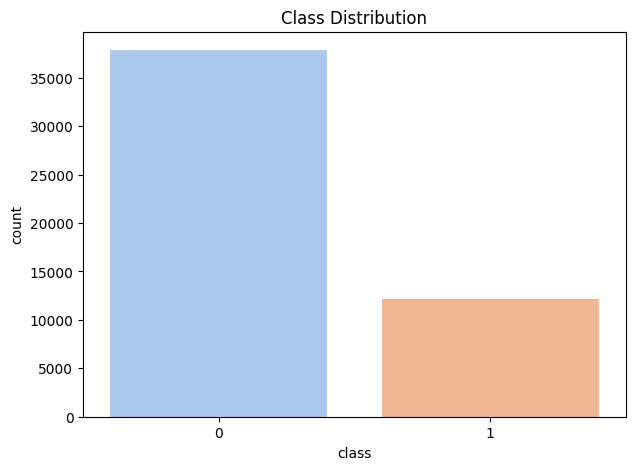

In [12]:
#countplot
plt.figure(figsize=(7, 5))
sns.countplot(x='class', data=df_train, palette='pastel')
plt.title('Class Distribution')
plt.show()
#data imbalance

(-1.09999822603791,
 1.0999999096086115,
 -1.0999995127751956,
 1.0999999754587424)

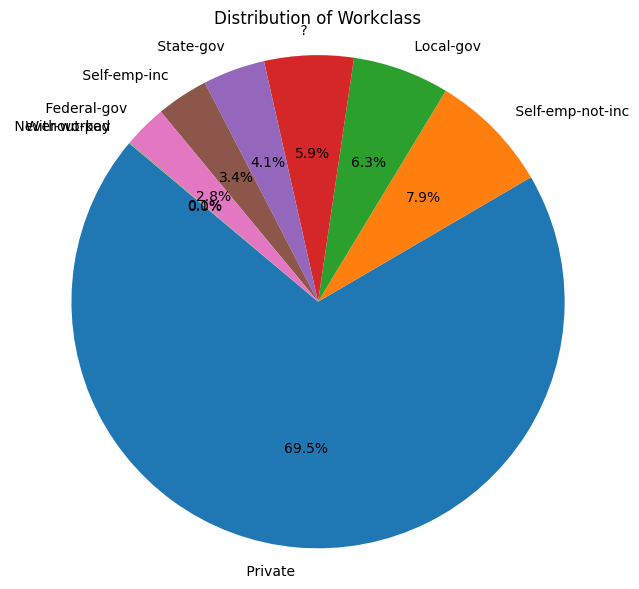

In [13]:
#work class distribution
value_counts = X_train['workclass'].value_counts()
plt.figure(figsize=(7, 7))  # Set the size of the figure
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Workclass')  # Add a title
plt.axis('equal')

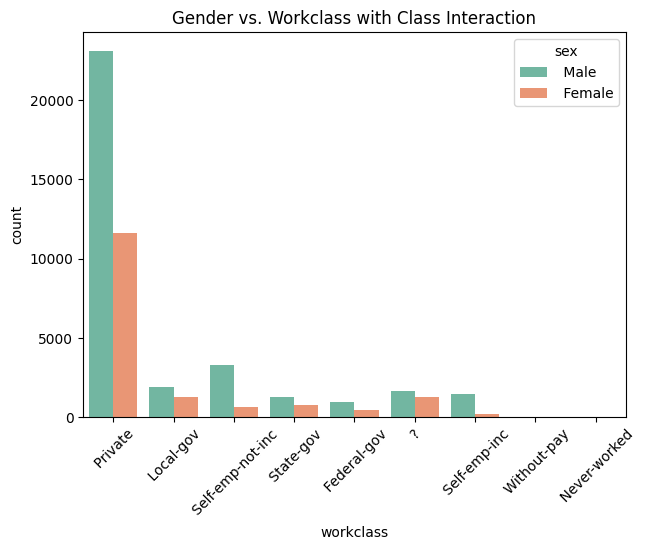

In [14]:
# Gender vs. Workclass with Class Interaction
plt.figure(figsize=(7, 5))
sns.countplot(x='workclass', hue='sex', data=df_train, palette='Set2')
plt.title('Gender vs. Workclass with Class Interaction')
plt.xticks(rotation=45)
plt.show()


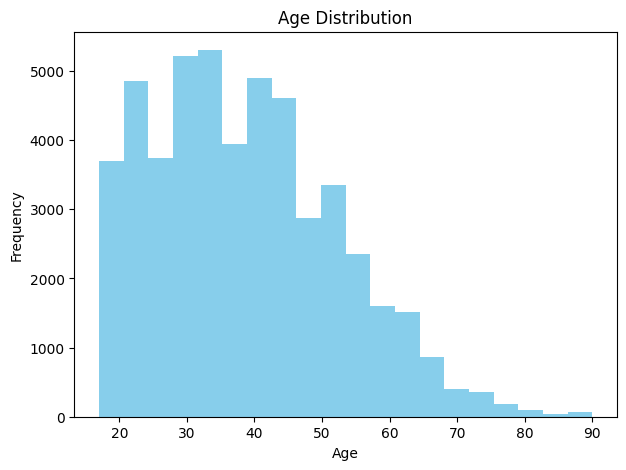

In [15]:
#age distribution
plt.figure(figsize=(7,5))
plt.hist(X_train['age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

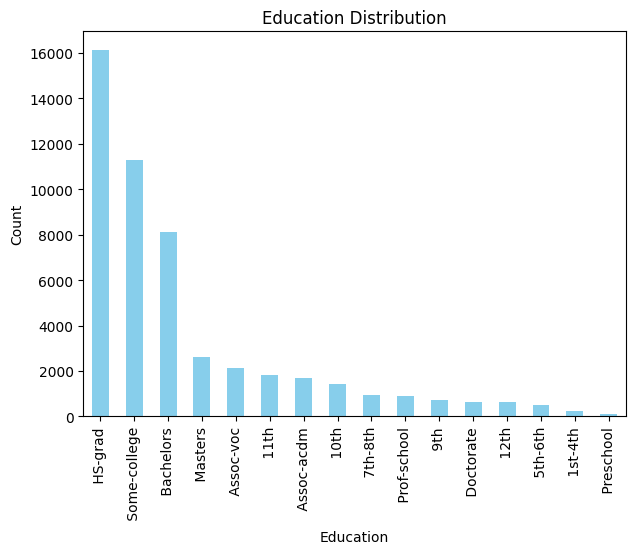

In [16]:
#education distribution
plt.figure(figsize=(7, 5))
X_train['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [17]:
# Correlation of features with the target variable
correlation_with_target = df_train.corr()['class'].sort_values(ascending=False)
print(correlation_with_target)


class             1.000000
education_num     0.328062
age               0.232792
hours_per_week    0.225702
capital_gain      0.219932
capital_loss      0.150071
Name: class, dtype: float64


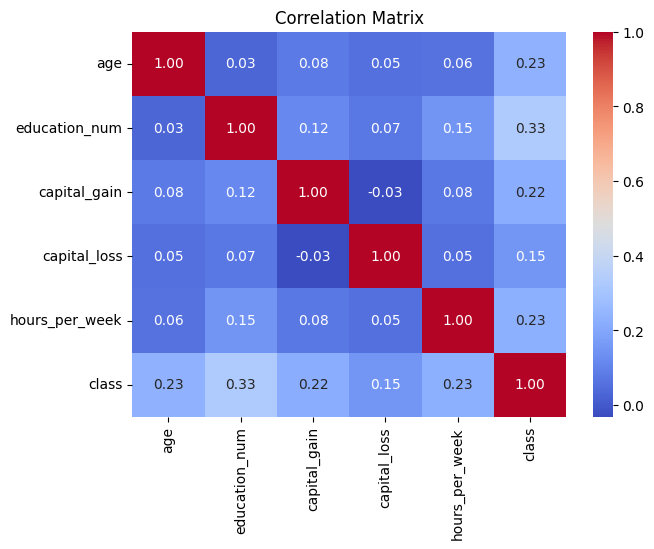

In [18]:
# correlation analysis
correlation_matrix = df_train.corr()
# Plot the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Comparison

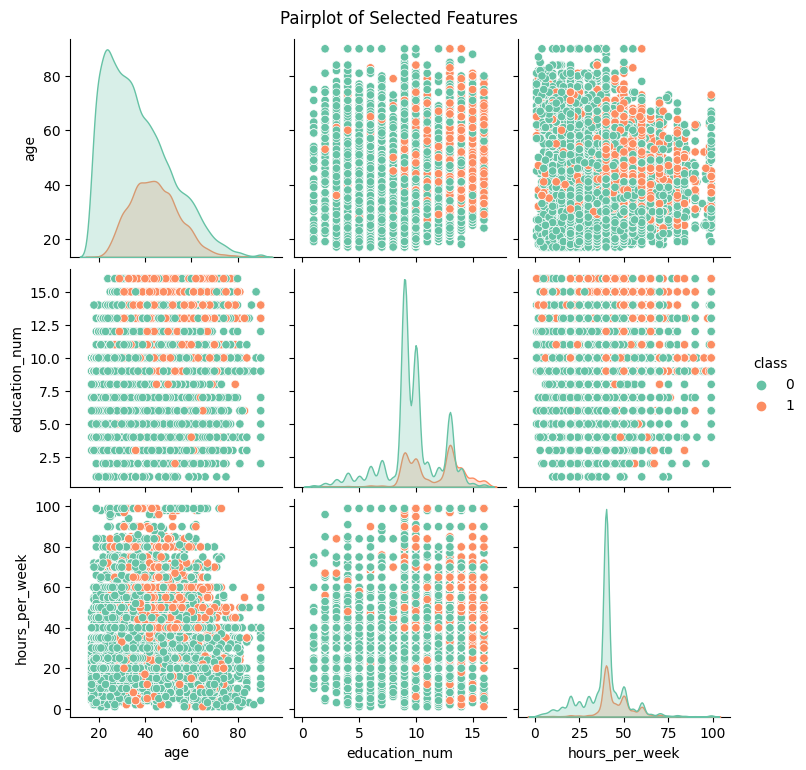

In [20]:
#pairplot
selected_features = ['age', 'education_num', 'hours_per_week', 'class']
sns.pairplot(df_train[selected_features], hue='class', palette='Set2')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


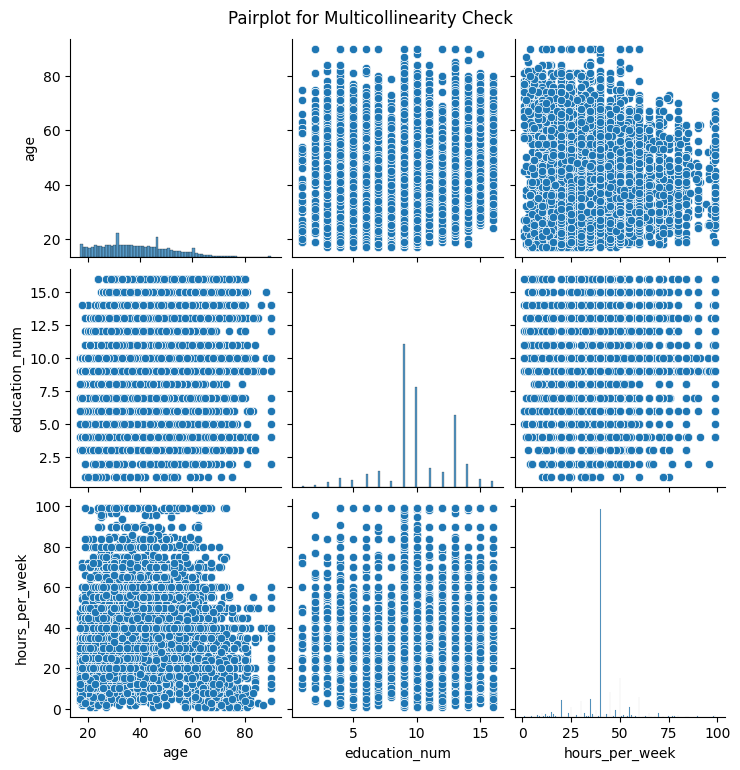

In [22]:
# Pairplot for a subset of features to check for multicollinearity
subset_features = ['age', 'education_num', 'hours_per_week']
sns.pairplot(df_train[subset_features], palette='Set2')
plt.suptitle('Pairplot for Multicollinearity Check', y=1.02)
plt.show()


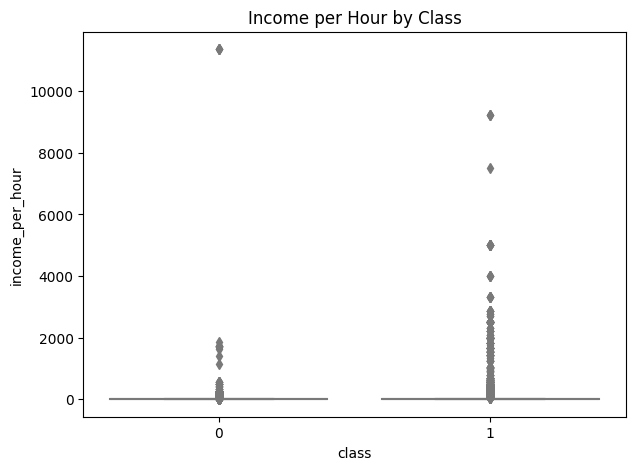

In [23]:
# Creating a new feature 'income_per_hour'
df_train['income_per_hour'] = df_train['capital_gain'] / df_train['hours_per_week']
df_test['income_per_hour'] = df_test['capital_gain'] / df_test['hours_per_week']

# Visualize the new feature
plt.figure(figsize=(7, 5))
sns.boxplot(x='class', y='income_per_hour', data=df_train, palette='coolwarm')
plt.title('Income per Hour by Class')
plt.show()
#outliers

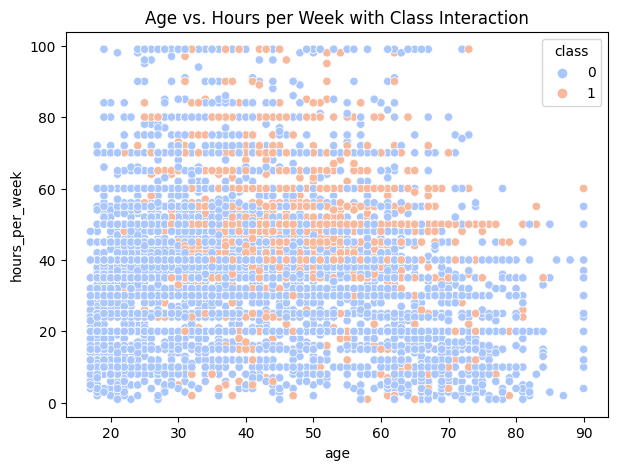

In [24]:
# Age vs. Hours per Week interaction
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='hours_per_week', hue='class', data=df_train, palette='coolwarm')
plt.title('Age vs. Hours per Week with Class Interaction')
plt.show()


# Create Pipeline for Feaure Preprocessing and use Clustering to find labels


In [26]:
#data preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

num_cols= X_train.select_dtypes(exclude='object').columns.tolist()
cat_cols= X_train.select_dtypes(include='object').columns.tolist()
print(num_cols, cat_cols)
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

preprocessing_pipe = ColumnTransformer(transformers=[('num pipeline', num_pipeline, num_cols),
                                                      ('cat pipeline', cat_pipeline, cat_cols)])

print(preprocessing_pipe)

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'] ['workclass', 'fnlwgt', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['age', 'education_num', 'capital_gain',
                                  'capital_loss', 'hours_per_week']),
                                ('cat pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                  

In [27]:
# # #Determine optimal number of clusters using elbow methods

# from sklearn.cluster import KMeans

# k_values= range(1000,3000,50)
# inertia_values=[]
# for k in k_values:
#   cluster_pipe = Pipeline([('data_processing', preprocessing_pipe),

#                           ('kmeans',KMeans(n_clusters=k, n_init='auto',random_state=42))
#                              ])
#   cluster_pipe.fit(X_train)
#   inertia_values.append(cluster_pipe['kmeans'].inertia_)

# plt.figure(figsize=(6,5))
# plt.plot(k_values, inertia_values, marker='o')
# plt.xlabel('Number of  Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow method for Optimal K')
# plt.show()

In [28]:
# using the optimal clusters for clustering

from sklearn.cluster import KMeans
k=2000
cluster_pipe = Pipeline([('data_processing', preprocessing_pipe),

                          ('kmeans',KMeans(n_clusters=k, n_init='auto'))
                             ])

X_dist = cluster_pipe.fit_transform(X_train)
X_dist  #X_dist represent the distance to cluster centroids for every record

array([[7.1157487 , 2.50866975, 3.07200558, ..., 3.12960963, 2.88565149,
        5.20135055],
       [7.8554372 , 3.65405447, 4.6469384 , ..., 2.44616389, 3.84892772,
        6.55880186],
       [7.56834567, 3.74658995, 4.28092774, ..., 2.99141931, 3.91631114,
        6.13151208],
       ...,
       [7.42248057, 3.22113062, 3.29628491, ..., 4.17734601, 2.93532602,
        5.61260227],
       [7.64907739, 3.03043745, 3.38494599, ..., 3.5301853 , 3.42224547,
        5.50951417],
       [7.67279147, 3.78173862, 3.75751585, ..., 4.09873326, 3.52386144,
        5.68802743]])

In [29]:
representative_idx = np.argmin(X_dist, axis=0)   #computes the indices of the minimum values
X_representative = X_train.iloc[representative_idx]   #extract the record from X_train from the indices of minimum values
X_representative
y_representative = y_train.iloc[representative_idx]   #extract the record from y_train from the indices of minimum values
# y_representative_digits = y_train[representative_digit_idx]

# Modelling

In [30]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## LOGISTIC REGRESSION

In [31]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

logreg_pipe = Pipeline([('data_processing', preprocessing_pipe),

                          ('log',LogisticRegression(solver='liblinear'))
                             ])
param_grid = {
    'log__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'log__solver': ['liblinear', 'lbfgs', 'saga'],  # Algorithm to use in the optimization problem
    'log__penalty': ['l1', 'l2']  # Regularization penalty
}

# Create GridSearchCV object
grid_search_LR = GridSearchCV(logreg_pipe, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to representative data
grid_search_LR.fit(X_representative, y_representative)

# # Get best parameters and best score
best_params = grid_search_LR.best_params_
best_score = grid_search_LR.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'log__C': 1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}
Best Score: 0.8465


Accuracy: 0.8457
Precision: 0.6968
Recall: 0.6193

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     11441
           1       0.70      0.62      0.66      3559

    accuracy                           0.85     15000
   macro avg       0.79      0.77      0.78     15000
weighted avg       0.84      0.85      0.84     15000

Confusion Matrix:
[[10482   959]
 [ 1355  2204]]


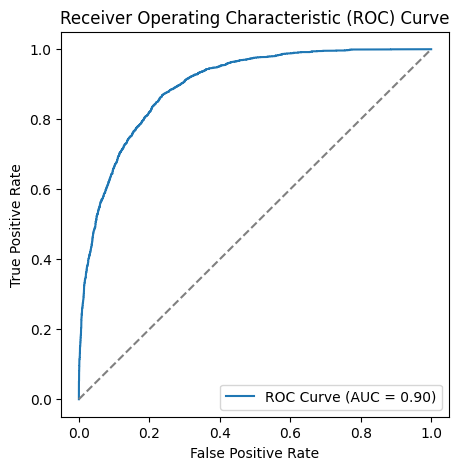

In [32]:
# LOGISTIC REGRESSION - Evaluate the best model on the test set

best_model_LR = grid_search_LR.best_estimator_ #get the best model with best parameters form the grid search
y_pred = best_model_LR.predict(X_test) #predicting the labels using the best model
test_accuracy = best_model_LR.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Cross-validation with best model
# cv_accuracy = cross_val_score(best_model_LR, X_train, y_train, cv=5, scoring='accuracy').mean()

# Output evaluation metrics
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# print(f"Cross-validated Accuracy: {cv_accuracy:.4f}")
print("\nClassification Report:\n",classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
y_prob = grid_search_LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## RANDOM FOREST

In [33]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([('data_processing', preprocessing_pipe),

                          ('rf',RandomForestClassifier())
                             ])
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 20]
}

# Create GridSearchCV object
grid_search_RF = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to representative data
grid_search_RF.fit(X_representative, y_representative)

# # Get best parameters and best score
best_params = grid_search_RF.best_params_
best_score = grid_search_RF.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'rf__max_depth': None, 'rf__n_estimators': 300}
Best Score: 0.8555000000000001


Accuracy: 0.8448
Precision: 0.7125
Recall: 0.5799

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11441
           1       0.71      0.58      0.64      3559

    accuracy                           0.84     15000
   macro avg       0.79      0.75      0.77     15000
weighted avg       0.84      0.84      0.84     15000

Confusion Matrix:
[[10608   833]
 [ 1495  2064]]


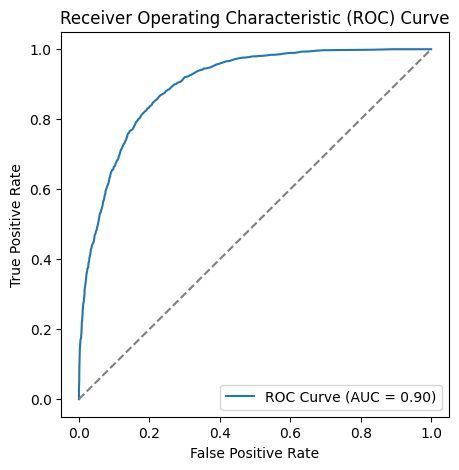

In [34]:
# RANDOM FOREST - Evaluate the best model on the test set

best_model_RF = grid_search_RF.best_estimator_
y_pred = best_model_RF.predict(X_test)
test_accuracy = best_model_RF.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Cross-validation with best model
# cv_accuracy = cross_val_score(best_model_RF, X_train, y_train, cv=5, scoring='accuracy').mean()

# Output evaluation metrics
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# print(f"Cross-validated Accuracy: {cv_accuracy:.4f}")
print("\nClassification Report:\n",classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
y_prob = grid_search_RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## SUPPORT VECTOR MACHINE

In [35]:
# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

svm_pipe = Pipeline([('data_processing', preprocessing_pipe),

                          ('svm',SVC(probability=True))
                             ])
param_grid = {'svm__C': [0.1, 1, 10, 100],
              'svm__gamma': [1, 0.1, 0.01, 0.001],
              'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Create GridSearchCV object
grid_search_SVM = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to representative data
grid_search_SVM.fit(X_representative, y_representative)

# # Get best parameters and best score
best_params = grid_search_SVM.best_params_
best_score = grid_search_SVM.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Score: 0.8515


Accuracy: 0.8478
Precision: 0.6869
Recall: 0.6589

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     11441
           1       0.69      0.66      0.67      3559

    accuracy                           0.85     15000
   macro avg       0.79      0.78      0.79     15000
weighted avg       0.85      0.85      0.85     15000

Confusion Matrix:
[[10372  1069]
 [ 1214  2345]]


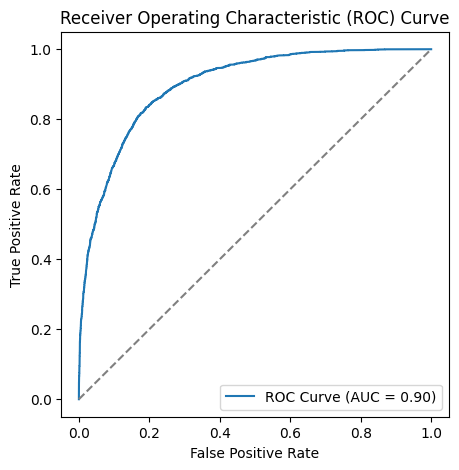

In [36]:
# SUPPORT VECTOR MACHINE - Evaluate the best model on the test set

best_model_SVM = grid_search_SVM.best_estimator_
y_pred = best_model_SVM.predict(X_test)
test_accuracy = best_model_SVM.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Cross-validation with best model
# cv_accuracy = cross_val_score(best_model_SVM, X_train, y_train, cv=5, scoring='accuracy').mean()

# Output evaluation metrics
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# print(f"Cross-validated Accuracy: {cv_accuracy:.4f}")
print("\nClassification Report:\n",classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC
y_prob = grid_search_SVM.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Conclusion

**Accuracy:**

All three classifiers demonstrate relatively similar accuracy values around 0.84-0.85, indicating the proportion of correctly predicted instances among the total instances is reasonably high.

**Precision and Recall:**

Precision measures the accuracy of positive predictions, and recall measures the proportion of actual positive instances that were predicted correctly.

Logistic Regression and Random Forest exhibit higher precision values for class 1 (around 0.71) compared to SVM (0.69).

Logistic Regression and Random Forest have a lower recall for class 1 (around 0.62-0.66) compared to SVM (0.66).

**Overall Assessment:**

All classifiers perform reasonably well with accuracy around 0.84-0.85 and AUC 90%

Logistic Regression and Random Forest tend to have slightly better precision and recall values for class 1 compared to SVM.

The classifiers seem to perform better at predicting instances belonging to class 0 (negative class) compared to class 1 (positive class).
